# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our class
from ExchangeEconomy import ExchangeEconomyClass

# We now define our model 
model = ExchangeEconomyClass()

# Question 1

In [19]:
# Define N
N = 75

# Make a list of (x1,x2) for consumer A
list_A = []

for n1 in range(N+1):
    for n2 in range(N+1):
        list_A.append([n1/N,n2/N])

# Find consumer A and B's utility at the intial endowments
A_endowment = model.utility_A(0.8,0.3)
B_endowment = model.utility_B(0.2,0.7)

liste_A_1 = list_A.copy()

# Remove points which have lower values of utility for consumer A or B than their initial endowments
for i in list_A:
    if model.utility_A(i[0], i[1]) < A_endowment or model.utility_B(1-i[0], 1-i[1]) < B_endowment:
        liste_A_1.remove(i)
liste_A_1

[[0.08, 0.96],
 [0.09333333333333334, 0.88],
 [0.09333333333333334, 0.8933333333333333],
 [0.09333333333333334, 0.9066666666666666],
 [0.09333333333333334, 0.92],
 [0.09333333333333334, 0.9333333333333333],
 [0.09333333333333334, 0.9466666666666667],
 [0.09333333333333334, 0.96],
 [0.10666666666666667, 0.8266666666666667],
 [0.10666666666666667, 0.84],
 [0.10666666666666667, 0.8533333333333334],
 [0.10666666666666667, 0.8666666666666667],
 [0.10666666666666667, 0.88],
 [0.10666666666666667, 0.8933333333333333],
 [0.10666666666666667, 0.9066666666666666],
 [0.10666666666666667, 0.92],
 [0.10666666666666667, 0.9333333333333333],
 [0.10666666666666667, 0.9466666666666667],
 [0.10666666666666667, 0.96],
 [0.12, 0.7866666666666666],
 [0.12, 0.8],
 [0.12, 0.8133333333333334],
 [0.12, 0.8266666666666667],
 [0.12, 0.84],
 [0.12, 0.8533333333333334],
 [0.12, 0.8666666666666667],
 [0.12, 0.88],
 [0.12, 0.8933333333333333],
 [0.12, 0.9066666666666666],
 [0.12, 0.92],
 [0.12, 0.9333333333333333],


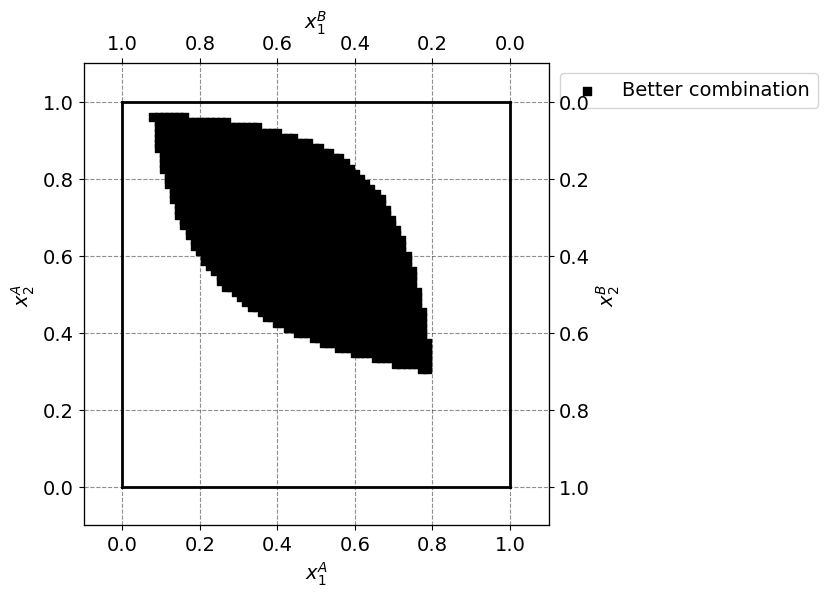

In [58]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
ax_A.scatter([point[0] for point in liste_A_1], [point[1] for point in liste_A_1], marker='s', color='black', label='Better combination')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0)); 

This shows the combinations of x1 and x2 for consumer A and B, that leaves both consumers better off or at the same utility as the initial endowments. 

# Question 2

In [11]:
# Define the range of p1 values
p1_values = np.arange(0.5, 2.51, 1/75)
errors = []

# Calculate errors for the range of p1 values
for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    errors.append((p1, eps1, eps2))

# Print the results
print("Errors:")
for error in errors:
    print(f"p1: {error[0]:.2f}, Errors from good 1: {error[1]:.4f}, Errors from good 2: {error[2]:.4f}")


Errors:
p1: 0.50, Errors from good 1: 0.5333, Errors from good 2: -0.2667
p1: 0.51, Errors from good 1: 0.5039, Errors from good 2: -0.2587
p1: 0.53, Errors from good 1: 0.4759, Errors from good 2: -0.2507
p1: 0.54, Errors from good 1: 0.4494, Errors from good 2: -0.2427
p1: 0.55, Errors from good 1: 0.4241, Errors from good 2: -0.2347
p1: 0.57, Errors from good 1: 0.4000, Errors from good 2: -0.2267
p1: 0.58, Errors from good 1: 0.3770, Errors from good 2: -0.2187
p1: 0.59, Errors from good 1: 0.3551, Errors from good 2: -0.2107
p1: 0.61, Errors from good 1: 0.3341, Errors from good 2: -0.2027
p1: 0.62, Errors from good 1: 0.3140, Errors from good 2: -0.1947
p1: 0.63, Errors from good 1: 0.2947, Errors from good 2: -0.1867
p1: 0.65, Errors from good 1: 0.2763, Errors from good 2: -0.1787
p1: 0.66, Errors from good 1: 0.2586, Errors from good 2: -0.1707
p1: 0.67, Errors from good 1: 0.2416, Errors from good 2: -0.1627
p1: 0.69, Errors from good 1: 0.2252, Errors from good 2: -0.1547
p1

# Question 3

In [13]:
# We can see that the market clearing price must be between 0.94 and 0.95.
# This is because the errors are closes to zero at this point.
# The new range is going to be small with a low tolerance in order to find the right market clearing price

p1_new_values = np.arange(0.94, 0.95, 1/7500000)
market_clearing_prices = []

# We calculate the market clearing prices
for p1 in p1_new_values:
    eps1, eps2 = model.check_market_clearing(p1)
    if np.isclose(eps1, 0, atol=1e-5) and np.isclose(eps2, 0, atol=1e-5):
        market_clearing_prices.append(p1)

# Print the market clearing prices for p1
print("Market clearing prices for p1:", market_clearing_prices)


Market clearing prices for p1: [0.9444288000013565, 0.9444289333346899, 0.9444290666680233, 0.9444292000013567, 0.94442933333469, 0.9444294666680234, 0.9444296000013568, 0.9444297333346902, 0.9444298666680235, 0.9444300000013569, 0.9444301333346903, 0.9444302666680237, 0.944430400001357, 0.9444305333346904, 0.9444306666680238, 0.9444308000013572, 0.9444309333346905, 0.9444310666680239, 0.9444312000013573, 0.9444313333346906, 0.944431466668024, 0.9444316000013574, 0.9444317333346908, 0.9444318666680241, 0.9444320000013575, 0.9444321333346909, 0.9444322666680243, 0.9444324000013576, 0.944432533334691, 0.9444326666680244, 0.9444328000013578, 0.9444329333346911, 0.9444330666680245, 0.9444332000013579, 0.9444333333346913, 0.9444334666680246, 0.944433600001358, 0.9444337333346914, 0.9444338666680248, 0.9444340000013581, 0.9444341333346915, 0.9444342666680249, 0.9444344000013583, 0.9444345333346916, 0.944434666668025, 0.9444348000013584, 0.9444349333346918, 0.9444350666680251, 0.9444352000013

Based on the results we can see that the market clearing price must be approx 0.9444

# Question 4.a ???

Warning: We werent able to solve 4.a and 4.b, we are pretty sure that 4.a is not correct, and 4.b is certainly wrong.

In [37]:
# Define the varibles max_utility and best_price 
max_utility_4a = float('-inf')  # We start out with a very low number
best_price_4a = None

# Define the equation for conusmer B's endowments 
par.w1B = 1 - par.w1A
par.w2B = 1 - par.w2A

# Loop through different prices for p1 in the p1_values vector (defined in question 2)
for p1 in p1_values:
   # Calculate the utility for p1
   x1A = model.demand_A1(p1)
   x2A = model.demand_A2(p1)
   utility = model.utility_A(x1A, x2A)
   
   # We save the p1 that yields the highest utility found within the loop 
   if utility > max_utility_4a:
      max_utility_4a = utility
      best_price_4a = p1

# Given the best price, we now find consumer A's demand for good 1 and 2
allocation_x1a_4a = model.demand_A1(best_price_4a)
allocation_x2a_4a = model.demand_A2(best_price_4a)

# We print the best price (the p1 that yields the highest utility for consumer A), consumer A's utility and consumer A's demand for good 1 and 2
print("Consumer A's best price for good 1 (best p1):", best_price_4a)
print("Consumer A's utility:", max_utility_4a)
print("Allocation of x1a:", allocation_x1a_4a)
print("Allocation of x2a:", allocation_x2a_4a)

Consumer A's best price for good 1 (best p1): 2.4999999999999964
Consumer A's utility: 0.896698773051945
Allocation of x1a: 0.3066666666666667
Allocation of x2a: 1.5333333333333317


# Question 4.b ???

In [38]:
# We create a new vector for p1
p1_values_2 = np.arange(0.5, 1000, 1/75)

# Define the varibles max_utility and best_price 
max_utility_4b = float('-inf')  # We start out with a very low number
best_price_4b = None

# Loop through different prices for p1 in the p1_values_2 vector
for p1 in p1_values_2:
    # Calculate the utility for p1
    x1A = model.demand_A1(p1)
    x2A = model.demand_A2(p1)
    utility = model.utility_A(x1A, x2A)
    
    # We save the p1 that yields the highest utility found within the loop
    if utility > max_utility_4b:
        max_utility_4b = utility
        best_price_4b = p1

# Given the best price, we now find consumer A's demand for good 1 and 2
allocation_x1a_4b = model.demand_A1(best_price_4b)
allocation_x2a_4b = model.demand_A2(best_price_4b)

# We print the best price (the p1 that yields the highest utility for consumer A), consumer A's utility and consumer A's demand for good 1 and 2
print("Consumer A's best price for good 1 (best p1):", best_price_4b)
print("Consumer A's utility:", max_utility_4b)
print("Allocation of x1a:", allocation_x1a_4b)
print("Allocation of x2a:", allocation_x2a_4b)

Consumer A's best price for good 1 (best p1): 999.9933333333314
Consumer A's utility: 42.34638062831735
Allocation of x1a: 0.26676666733333776
Allocation of x2a: 533.5297777777768


# Question 5.a

In [22]:
print(par.w2B)

0.7


In [39]:
# Import minimize 
from scipy.optimize import minimize

# B's utility from the initial endowment, to use as a constraint in optimization
B_initial_utility = model.utility_B(par.w1B, par.w2B)

# Define the choice set C for A: x1_A is discretized
x1_A_choices = np.linspace(0, 1, N+1)

# Optimization problem setup
def objective(x):
    x1A, x2A = x
    # Objective function is A's utility, which we want to maximize
    return -model.utility_A(x1A, x2A)

# Constraints for the optimization: B's utility should be at least as high as from the initial endowment
def constraint_B_utility(x, B_initial_utility=B_initial_utility):
    x1A, x2A = x
    # This is the utility of B given the proposed allocation for A (and thus for B)
    utility_B_given = model.utility_B(1-x1A, 1-x2A)
    return utility_B_given - B_initial_utility

constraints = [{'type': 'ineq', 'fun': constraint_B_utility}]

# Initialize variables to store results
results_5a = []
best_utility_5a = float('-inf')
best_allocation_5a = None

for x1A in x1_A_choices:
    # We only need to optimize over x2_A, since x1_A is given by the loop
    result = minimize(objective, [x1A, 0.5], method='SLSQP', bounds=[(0, 1), (0, 1)], constraints=constraints)
    if result.success and -result.fun > best_utility_5a:
        best_utility_5a = -result.fun
        best_allocation_5a = result.x

print("Best allocation for consumer A:", best_allocation_5a)


Best allocation for consumer A: [0.57575154 0.84443366]


# Question 5.b

In [40]:
# Now solve for 5b: No restriction on x1_A, so we optimize over both x1_A and x2_A
result_5b = minimize(objective, [0.5, 0.5], method='SLSQP', bounds=[(0, 1), (0, 1)], constraints=constraints)

# Check if the optimization was successful and output results for 5b
allocation_5b = result_5b.x if result_5b.success else None

print("Best allocation for consumer A:", allocation_5b)

Best allocation for consumer A: [0.68087076 0.72506828]


If we compare 5.a and 5.b with their utility from initial endowments we find consumers B utility to be almost the same. The utility for consumer A has risen in both but mostly in 5.b since the products can be bought in more combinations (the restrictions for consumer A are not as strict in 5.b)

# Question 6.a

In [49]:
# The utility function for consumer A plus consumer B
def aggregate_utility(x):
    x1A, x2A = x
    x1B = 1 - x1A
    x2B = 1 - x2A
    return model.utility_A(x1A, x2A) + model.utility_B(x1B, x2B)

# Initial guess
initial_guess = [par.w1A, par.w2A]

# There is a total of 1 of x1 and x2.
bounds = [(0, 1), (0, 1)]

# Set op the maximization problem
result = minimize(
    lambda x: -aggregate_utility(x), 
    initial_guess,
    bounds=bounds)

# The results 
if result.success:
    optimal_x1A = result.x[0]
    optimal_x2A = result.x[1]
    optimal_x1B = 1 - optimal_x1A
    optimal_x2B = 1 - optimal_x2A
    optimal_aggregate_utility = -result.fun
else:
    optimal_x1A = optimal_x2A = optimal_x1B = optimal_x2B = optimal_aggregate_utility = None

print("Optimal x1A:", optimal_x1A, "Optimal x2A:", optimal_x2A)
print("Optimal x1B:", optimal_x1B,"Optimal x2B:", optimal_x2B)


Optimal x1A: 0.3333341514009324 Optimal x2A: 0.6666676011670838
Optimal x1B: 0.6666658485990675 Optimal x2B: 0.3333323988329162


# Question 6.b ???

We have not made question 6.b since we need the results from question 4.a and 4.b

# Question 7

In [52]:
# Generate 50 different initial endowments
np.random.seed(0)  # Set the seed for reproducibility
initial_endowments_A = np.random.uniform(0, 1, (50, 2))

# We print the results
print(initial_endowments_A)

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


# Question 8

We cannot code the market equilibriums and therefore we have plottet the 50 different initial endowments. 

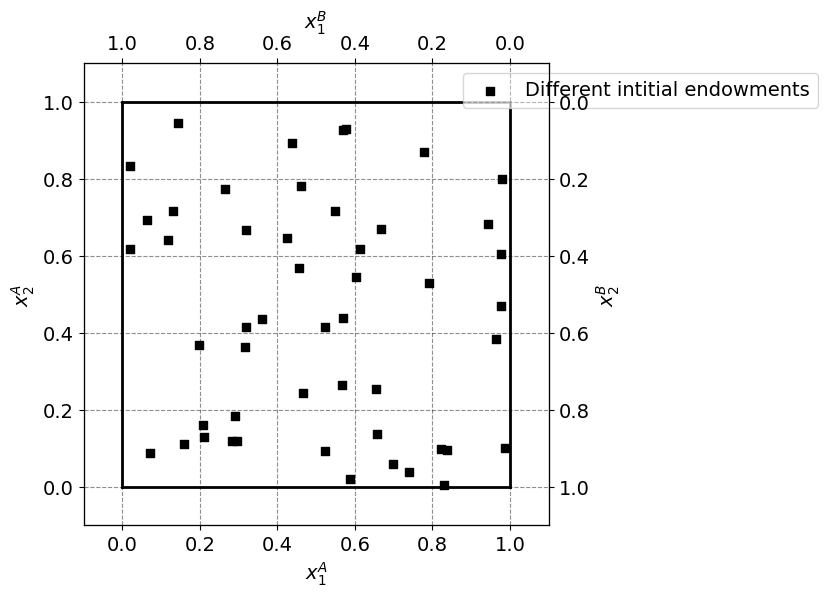

In [57]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
#ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter([point[0] for point in initial_endowments_A], [point[1] for point in initial_endowments_A], marker='s', color='black', label='Different intitial endowments')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));